In [1]:
import pandas as pd

# Load the CSV files
trips_full = pd.read_csv('Trips_Full Data (2).csv')
trips_distance = pd.read_csv('Trips_by_Distance (1).csv')

# Display the first few rows of each DataFrame
print(trips_full.head())
print(trips_distance.head())

  Month of Date Week of Date  Year of Date     Level           Date  \
0        August      Week 32          2019  National  8/4/2019 0:00   
1        August      Week 32          2019  National  8/5/2019 0:00   
2        August      Week 32          2019  National  8/6/2019 0:00   
3        August      Week 32          2019  National  8/7/2019 0:00   
4        August      Week 32          2019  National  8/8/2019 0:00   

  Week Ending Date  Trips <1 Mile  People Not Staying at Home  \
0        10-Aug-19      292959749                   258404133   
1        10-Aug-19      317133861                   262199758   
2        10-Aug-19      324443205                   260096133   
3        10-Aug-19      358483024                   258878802   
4        10-Aug-19      300765870                   262410045   

   Population Staying at Home       Trips  ...  Trips 10-25 Miles  \
0                    67763287  1322685497  ...          200922270   
1                    63967662  1412564488  .

In [1]:
import pandas as pd
import dask.dataframe as dd

# Define the data types for the columns
dtype_dict = {
    'County Name': 'object',
    'Number of Trips': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips >=500': 'float64',
    'Population Not Staying at Home': 'float64',
    'Population Staying at Home': 'float64',
    'State Postal Code': 'object'
}

# Load the CSV files using Dask with specified data types
trips_full_dask = dd.read_csv('Trips_Full Data (2).csv', dtype=dtype_dict)
trips_distance_dask = dd.read_csv('Trips_by_Distance (1).csv', dtype=dtype_dict)

# Display the first few rows of each Dask DataFrame
print("\nDask DataFrame - Trips Full:")
print(trips_full_dask.head())

print("\nDask DataFrame - Trips by Distance:")
print(trips_distance_dask.head())


Dask DataFrame - Trips Full:
  Month of Date Week of Date  Year of Date     Level           Date  \
0        August      Week 32          2019  National  8/4/2019 0:00   
1        August      Week 32          2019  National  8/5/2019 0:00   
2        August      Week 32          2019  National  8/6/2019 0:00   
3        August      Week 32          2019  National  8/7/2019 0:00   
4        August      Week 32          2019  National  8/8/2019 0:00   

  Week Ending Date  Trips <1 Mile  People Not Staying at Home  \
0        10-Aug-19      292959749                   258404133   
1        10-Aug-19      317133861                   262199758   
2        10-Aug-19      324443205                   260096133   
3        10-Aug-19      358483024                   258878802   
4        10-Aug-19      300765870                   262410045   

   Population Staying at Home       Trips  ...  Trips 10-25 Miles  \
0                  67763287.0  1322685497  ...          200922270   
1             

In [6]:
import dask.dataframe as dd

# Load your datasets as Dask DataFrames
trips_distance_dask = dd.read_csv('Trips_by_Distance (1).csv')
trips_full_dask = dd.read_csv('Trips_Full Data (2).csv')

# Preprocess the datasets
def preprocess_data(dask_df):
    # Fill missing values based on data type
    for column in dask_df.columns:
        if dask_df[column].dtype in ['float64', 'int64']:
            dask_df[column] = dask_df[column].fillna(0)  # Fill numeric columns with 0
        elif dask_df[column].dtype == 'object':
            dask_df[column] = dask_df[column].fillna('')  # Fill string columns with an empty string
            dask_df[column] = dask_df[column].astype('category')  # Convert string columns to categorical

    return dask_df

# Preprocess the datasets
trips_distance = preprocess_data(trips_distance_dask)
trips_full = preprocess_data(trips_full_dask)

# Check the columns and first few rows of the Trips Full Data
print("Columns in Trips Full Data:")
print(trips_full.columns)

print("\nFirst few rows of Trips Full Data:")
print(trips_full.head())  # No compute() needed here

# Analyze the data
def analyze_trips(trips_df):
    # Check the actual column names
    print("Available columns:", trips_df.columns)

    # Adjust these column names based on your actual DataFrame
    staying_home_column = 'Population Staying at Home'  # Change this to the actual column name
    distance_traveled_column = 'Trips'  # Change this to the actual column name

    # Count the number of people staying at home
    staying_home_count = trips_df[trips_df[staying_home_column] > 0].shape[0].compute()
    
    # Calculate the total distance traveled by people who are not staying at home
    distance_traveled = trips_df[trips_df[staying_home_column] == 0][distance_traveled_column].sum().compute()
    
    return staying_home_count, distance_traveled

# Perform the analysis on the Trips Full Data
staying_home_count, total_distance_traveled = analyze_trips(trips_full)

# Output the results
print(f"Number of people staying at home: {staying_home_count}")
print(f"Total distance traveled by people not staying at home: {total_distance_traveled} units")

Columns in Trips Full Data:
Index(['Month of Date', 'Week of Date', 'Year of Date', 'Level', 'Date',
       'Week Ending Date', 'Trips <1 Mile', 'People Not Staying at Home',
       'Population Staying at Home', 'Trips', 'Trips 1-25 Miles',
       'Trips 1-3 Miles', 'Trips 10-25 Miles', 'Trips 100-250 Miles',
       'Trips 100+ Miles', 'Trips 25-100 Miles', 'Trips 25-50 Miles',
       'Trips 250-500 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles',
       'Trips 50-100 Miles', 'Trips 500+ Miles'],
      dtype='object')

First few rows of Trips Full Data:
  Month of Date Week of Date  Year of Date     Level           Date  \
0        August      Week 32          2019  National  8/4/2019 0:00   
1        August      Week 32          2019  National  8/5/2019 0:00   
2        August      Week 32          2019  National  8/6/2019 0:00   
3        August      Week 32          2019  National  8/7/2019 0:00   
4        August      Week 32          2019  National  8/8/2019 0:00   

  Week Ending D

In [8]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
# Define the data types for the columns
dtype_dict = {
    'County Name': 'object',
    'Number of Trips': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips >=500': 'float64',
    'Population Not Staying at Home': 'float64',
    'Population Staying at Home': 'float64',
    'State Postal Code': 'object'
}

# Load the Trips by Distance dataset as a Dask DataFrame with specified dtypes
trips_distance_dask = dd.read_csv('Trips_by_Distance (1).csv', dtype=dtype_dict)

# Preprocess the dataset
def preprocess_data(dask_df):
    # Fill missing values based on data type
    for column in dask_df.columns:
        if dask_df[column].dtype in ['float64', 'int64']:
            dask_df[column] = dask_df[column].fillna(0)  # Fill numeric columns with 0
        elif dask_df[column].dtype == 'object':
            dask_df[column] = dask_df[column].fillna('')  # Fill string columns with an empty string
            dask_df[column] = dask_df[column].astype('category')  # Convert string columns to categorical

    return dask_df

# Preprocess the Trips by Distance dataset
trips_distance = preprocess_data(trips_distance_dask)

# Check the columns and first few rows of the Trips by Distance Data
print("Columns in Trips by Distance Data:")
print(trips_distance.columns)

print("\nFirst few rows of Trips by Distance Data:")
print(trips_distance.head())  # No compute() needed here

# Analyze the data
def analyze_trips_distance(trips_df):
    # Check the actual column names
    print("Available columns:", trips_df.columns)

    # Adjust these column names based on your actual DataFrame
    staying_home_column = 'Population Staying at Home'  # Change this to the actual column name if needed
    distance_traveled_column = 'Number of Trips'  # Change this to the actual column name if needed

    # Count the number of people staying at home
    staying_home_count = trips_df[trips_df[staying_home_column] > 0].shape[0].compute()
    
    # Calculate the total distance traveled by people who are not staying at home
    distance_traveled = trips_df[trips_df[staying_home_column] == 0][distance_traveled_column].sum().compute()
    
    return staying_home_count, distance_traveled

# Perform the analysis on the Trips by Distance Data
staying_home_count_distance, total_distance_traveled_distance = analyze_trips_distance(trips_distance)

# Output the results
print(f"Number of people staying at home (Trips by Distance): {staying_home_count_distance}")
print(f"Total distance traveled by people not staying at home (Trips by Distance): {total_distance_traveled_distance} units")

Columns in Trips by Distance Data:
Index(['Level', 'Date', 'State FIPS', 'State Postal Code', 'County FIPS',
       'County Name', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500', 'Row ID', 'Week', 'Month'],
      dtype='object')

First few rows of Trips by Distance Data:
      Level      Date  State FIPS State Postal Code  County FIPS County Name  \
0  National  1/1/2019         0.0              <NA>          0.0        <NA>   
1  National  1/2/2019         0.0              <NA>          0.0        <NA>   
2  National  1/3/2019         0.0              <NA>          0.0        <NA>   
3  National  1/4/2019         0.0              <NA>          0.0        <NA>   
4  N

In [13]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 3.3 MB/s eta 0:00:00a 0:00:01


In [14]:
import seaborn as sns
print(sns.__version__)


0.13.2


In [25]:
import dask.dataframe as dd

# Load the Trips Full Data dataset
trips_full_dask = dd.read_csv('Trips_Full Data (2).csv')

# Preprocess the dataset
def preprocess_data(dask_df):
    # Fill missing values based on data type
    for column in dask_df.columns:
        if dask_df[column].dtype in ['float64', 'int64']:
            dask_df[column] = dask_df[column].fillna(0)  # Fill numeric columns with 0
        elif dask_df[column].dtype == 'object':
            dask_df[column] = dask_df[column].fillna('')  # Fill string columns with an empty string
            dask_df[column] = dask_df[column].astype('category')  # Convert string columns to categorical

    return dask_df

# Preprocess the Trips Full Data dataset
trips_full = preprocess_data(trips_full_dask)

# Check the columns and first few rows of the Trips Full Data
print("Columns in Trips Full Data:")
print(trips_full.columns.tolist())  # Print the list of columns

# Compute and print the first few rows
print("\nFirst few rows of Trips Full Data:")
print(trips_full.head())  # No compute() needed here

# Identify the relevant columns
trips_10_25_column = 'Trips 10-25 Miles'  # Corrected column name
trips_50_100_column = 'Trips 50-100 Miles'  # Corrected column name
date_column = 'Date'  # This should be correct

# Check if the columns exist
if trips_10_25_column not in trips_full.columns:
    print(f"Column '{trips_10_25_column}' does not exist in the DataFrame.")
if trips_50_100_column not in trips_full.columns:
    print(f"Column '{trips_50_100_column}' does not exist in the DataFrame.")
if date_column not in trips_full.columns:
    print(f"Column '{date_column}' does not exist in the DataFrame.")

# Filter for dates where more than 10,000,000 people conducted trips in the 10-25 category
if trips_10_25_column in trips_full.columns:
    dates_10_25 = trips_full[trips_full[trips_10_25_column] > 10000000][[date_column, trips_10_25_column]].compute()
    print("Dates with > 10,000,000 trips in the 10-25 category:")
    print(dates_10_25)

# Filter for dates where more than 10,000,000 people conducted trips in the 50-100 category
if trips_50_100_column in trips_full.columns:
    dates_50_100 = trips_full[trips_full[trips_50_100_column] > 10000000][[date_column, trips_50_100_column]].compute()
    print("\nDates with > 10,000,000 trips in the 50-100 category:")
    print(dates_50_100)

# Compare the two sets of dates
if 'dates_10_25' in locals() and 'dates_50_100' in locals():
    common_dates = set(dates_10_25[date_column]) & set(dates_50_100[date_column])
    print("\nCommon dates where both categories had > 10,000,000 trips:")
    print(common_dates)

Columns in Trips Full Data:
['Month of Date', 'Week of Date', 'Year of Date', 'Level', 'Date', 'Week Ending Date', 'Trips <1 Mile', 'People Not Staying at Home', 'Population Staying at Home', 'Trips', 'Trips 1-25 Miles', 'Trips 1-3 Miles', 'Trips 10-25 Miles', 'Trips 100-250 Miles', 'Trips 100+ Miles', 'Trips 25-100 Miles', 'Trips 25-50 Miles', 'Trips 250-500 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles', 'Trips 50-100 Miles', 'Trips 500+ Miles']

First few rows of Trips Full Data:
  Month of Date Week of Date  Year of Date     Level           Date  \
0        August      Week 32          2019  National  8/4/2019 0:00   
1        August      Week 32          2019  National  8/5/2019 0:00   
2        August      Week 32          2019  National  8/6/2019 0:00   
3        August      Week 32          2019  National  8/7/2019 0:00   
4        August      Week 32          2019  National  8/8/2019 0:00   

  Week Ending Date  Trips <1 Mile  People Not Staying at Home  \
0        10-Aug-19   

In [38]:
import dask.dataframe as dd

# Define the data types for the columns
dtype_dict = {
    'County Name': 'object',
    'Number of Trips': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips >=500': 'float64',
    'Population Not Staying at Home': 'float64',
    'Population Staying at Home': 'float64',
    'State Postal Code': 'object'
}

# Load the Trips by Distance dataset as a Dask DataFrame with specified dtypes
trips_distance_dask = dd.read_csv('Trips_by_Distance (1).csv', dtype=dtype_dict)

# Preprocess the dataset
def preprocess_distance_data(dask_df):
    # Fill missing values based on data type
    for column in dask_df.columns:
        if dask_df[column].dtype in ['float64', 'int64']:
            dask_df[column] = dask_df[column].fillna(0)  # Fill numeric columns with 0
        elif dask_df[column].dtype == 'object':
            dask_df[column] = dask_df[column].fillna('')  # Fill string columns with an empty string
            dask_df[column] = dask_df[column].astype('category')  # Convert string columns to categorical

    return dask_df

# Preprocess the Trips by Distance dataset
trips_distance = preprocess_distance_data(trips_distance_dask)

# Check the columns and first few rows of the Trips by Distance Data
print("Columns in Trips by Distance Data:")
print(trips_distance.columns.tolist())  # Print the list of columns

# Compute and print the first few rows
print("\nFirst few rows of Trips by Distance Data:")
print(trips_distance.head())  # No compute() needed here

# Identify relevant columns for analysis
trips_10_25_column = 'Number of Trips 10-25'  # Corrected column name
trips_50_100_column = 'Number of Trips 50-100'  # Corrected column name
date_column = 'Date'  # Assuming this is the correct date column

# Check if the columns exist
if trips_10_25_column not in trips_distance.columns:
    print(f"Column '{trips_10_25_column}' does not exist in the DataFrame.")
if trips_50_100_column not in trips_distance.columns:
    print(f"Column '{trips_50_100_column}' does not exist in the DataFrame.")
if date_column not in trips_distance.columns:
    print(f"Column '{date_column}' does not exist in the DataFrame.")

# Filter for dates where more than 10,000,000 people conducted trips in the 10-25 category
dates_10_25 = trips_distance[trips_distance[trips_10_25_column] > 10000000][[date_column, trips_10_25_column]].compute()
print("Dates with > 10,000,000 trips in the 10-25 category:")
print(dates_10_25)

# Filter for dates where more than 10,000,000 people conducted trips in the 50-100 category
dates_50_100 = trips_distance[trips_distance[trips_50_100_column] > 10000000][[date_column, trips_50_100_column]].compute()
print("\nDates with > 10,000,000 trips in the 50-100 category:")
print(dates_50_100)

# Compare the sets of dates
common_dates = set(dates_10_25[date_column]) & set(dates_50_100[date_column])
print("\nCommon dates where both categories had > 10,000,000 trips:")
print(common_dates)

Columns in Trips by Distance Data:
['Level', 'Date', 'State FIPS', 'State Postal Code', 'County FIPS', 'County Name', 'Population Staying at Home', 'Population Not Staying at Home', 'Number of Trips', 'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5', 'Number of Trips 5-10', 'Number of Trips 10-25', 'Number of Trips 25-50', 'Number of Trips 50-100', 'Number of Trips 100-250', 'Number of Trips 250-500', 'Number of Trips >=500', 'Row ID', 'Week', 'Month']

First few rows of Trips by Distance Data:
      Level      Date  State FIPS State Postal Code  County FIPS County Name  \
0  National  1/1/2019         0.0              <NA>          0.0        <NA>   
1  National  1/2/2019         0.0              <NA>          0.0        <NA>   
2  National  1/3/2019         0.0              <NA>          0.0        <NA>   
3  National  1/4/2019         0.0              <NA>          0.0        <NA>   
4  National  1/5/2019         0.0              <NA>          0.0        <NA>   

 

In [ ]:
import dask.dataframe as dd
import pandas as pd
from dask.distributed import Client
import time

# Define the data types for the columns
dtype_dict = {
    'County Name': 'category',
    'Number of Trips': 'float32',  # Use float32 instead of float64
    'Number of Trips 1-3': 'float32',
    'Number of Trips 10-25': 'float32',
    'Number of Trips 100-250': 'float32',
    'Number of Trips 25-50': 'float32',
    'Number of Trips 250-500': 'float32',
    'Number of Trips 3-5': 'float32',
    'Number of Trips 5-10': 'float32',
    'Number of Trips 50-100': 'float32',
    'Number of Trips <1': 'float32',
    'Number of Trips >=500': 'float32',
    'Population Not Staying at Home': 'float32',
    'Population Staying at Home': 'float32',
    'State Postal Code': 'category'
}

# Function to preprocess the dataset
def preprocess_distance_data(dask_df):
    # Fill missing values based on data type
    for column in dask_df.columns:
        if dask_df[column].dtype in ['float32', 'float64', 'int64']:
            dask_df[column] = dask_df[column].fillna(0)  # Fill numeric columns with 0
        elif dask_df[column].dtype == 'object':
            dask_df[column] = dask_df[column].fillna('')  # Fill string columns with an empty string
            dask_df[column] = dask_df[column].astype('category')  # Convert string columns to categorical
    return dask_df

# Function to analyze the dataset using Dask
def analyze_with_dask(n_workers):
    # Create a Dask client with the specified number of processors and adjusted memory limit
    client = Client(n_workers=n_workers, memory_limit='1GB', dashboard_address=':8788')  # Adjust memory limit as needed
    
    # Load the dataset with smaller chunks
    trips_distance_dask = dd.read_csv('Trips_by_Distance (1).csv', dtype=dtype_dict, blocksize='16MB')
    
    # Preprocess the dataset
    trips_distance = preprocess_distance_data(trips_distance_dask)
    
    # Repartition the data if necessary
    trips_distance = trips_distance.repartition(npartitions=20)  # Adjust the number of partitions as needed
    
    # Identify relevant columns for analysis
    trips_10_25_column = 'Number of Trips 10-25'
    trips_50_100_column = 'Number of Trips 50-100'
    date_column = 'Date'
    
    # Start timing the analysis
    start_time = time.time()
    
    # Filter for dates where more than 10,000,000 people conducted trips in the 10-25 category
    dates_10_25 = trips_distance[trips_distance[trips_10_25_column] > 10000000][[date_column, trips_10_25_column]].compute()
    
    # Filter for dates where more than 10,000,000 people conducted trips in the 50-100 category
    dates_50_100 = trips_distance[trips_distance[trips_50_100_column] > 10000000][[date_column, trips_50_100_column]].compute()
    
    # Compare the sets of dates
    common_dates = set(dates_10_25[date_column]) & set(dates_50_100[date_column])
    
    # End timing the analysis
    end_time = time.time()
    
    print(f"\nUsing Dask with {n_workers} processors:")
    print("Dates with > 10,000,000 trips in the 10-25 category:")
    print(dates_10_25)
    print("\nDates with > 10,000,000 trips in the 50-100 category:")
    print(dates_50_100)
    print("\nCommon dates where both categories had > 10,000,000 trips:")
    print(common_dates)
    print(f"\nTime taken: {end_time - start_time:.2f} seconds")

# Run the analysis with Dask using 10 processors
analyze_with_dask(n_workers=10)

# Run the analysis with Dask using 4 processors
analyze_with_dask(n_workers=4)

# Function to analyze the dataset using Pandas
def analyze_with_pandas():
    # Load the dataset
    trips_distance = pd.read_csv('Trips_by_Distance (1).csv', dtype=dtype_dict)
    
    # Preprocess the dataset
    trips_distance = preprocess_distance_data(trips_distance)
    
    # Identify relevant columns for analysis
    trips_10_25_column = 'Number of Trips 10-25'
    trips_50_100_column = 'Number of Trips 50-100'
    date_column = 'Date'
    
    # Start timing the analysis
    start_time = time.time()
    
    # Filter for dates where more than 10,000,000 people conducted trips in the 10-25 category
    dates_10_25 = trips_distance[trips_distance[trips_10_25_column] > 10000000][[date_column, trips_10_25_column]]
    
    # Filter for dates where more than 10,000,000 people conducted trips in the 50-100 category
    dates_50_100 = trips_distance[trips_distance[trips_50_100_column] > 10000000][[date_column, trips_50_100_column]]
    
    # Compare the sets of dates
    common_dates = set(dates_10_25[date_column]) & set(dates_50_100[date_column])
    
    # End timing the analysis
    end_time = time.time()
    
    print("\nUsing Pandas:")
    print("Dates with > 10,000,000 trips in the 10-25 category:")
    print(dates_10_25)
    print("\nDates with > 10,000,000 trips in the 50-100 category:")
    print(dates_50_100)
    print("\nCommon dates where both categories had > 10,000,000 trips:")
    print(common_dates)
    print(f"\nTime taken: {end_time - start_time:.2f} seconds")

# Run the analysis with Pandas
analyze_with_pandas()

2025-04-06 23:10:58,750 - distributed.nanny - WARNING - Restarting worker



Using Dask with 10 processors:
Dates with > 10,000,000 trips in the 10-25 category:
            Date  Number of Trips 10-25
0       1/1/2019            116904344.0
1       1/2/2019            167412704.0
2       1/3/2019            172027488.0
3       1/4/2019            176144496.0
4       1/5/2019            165239792.0
...          ...                    ...
27878  6/15/2021            200549280.0
27879  6/16/2021            199082592.0
27880  6/17/2021            198280336.0
27881  6/18/2021            202609024.0
27882  6/19/2021            178997856.0

[3749 rows x 2 columns]

Dates with > 10,000,000 trips in the 50-100 category:
            Date  Number of Trips 50-100
0       1/1/2019              15686639.0
1       1/2/2019              17739184.0
2       1/3/2019              18366626.0
3       1/4/2019              19315784.0
4       1/5/2019              19363940.0
...          ...                     ...
27878  6/15/2021              19181256.0
27879  6/16/2021           

/home/lovepre21/.local/lib/python3.10/site-packages/distributed/node.py:187: UserWarning: Port 8788 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39749 instead
  warnings.warn(


In [ ]:
import dask.dataframe as dd
import pandas as pd
from dask.distributed import Client
import time

# Define the data types for the columns
dtype_dict = {
    'County Name': 'category',
    'Number of Trips': 'float32',  # Use float32 instead of float64
    'Number of Trips 1-3': 'float32',
    'Number of Trips 10-25': 'float32',
    'Number of Trips 100-250': 'float32',
    'Number of Trips 25-50': 'float32',
    'Number of Trips 250-500': 'float32',
    'Number of Trips 3-5': 'float32',
    'Number of Trips 5-10': 'float32',
    'Number of Trips 50-100': 'float32',
    'Number of Trips <1': 'float32',
    'Number of Trips >=500': 'float32',
    'Population Not Staying at Home': 'float32',
    'Population Staying at Home': 'float32',
    'State Postal Code': 'category'
}

# Function to preprocess the dataset
def preprocess_distance_data(dask_df):
    # Fill missing values based on data type
    for column in dask_df.columns:
        if dask_df[column].dtype in ['float32', 'float64', 'int64']:
            dask_df[column] = dask_df[column].fillna(0)  # Fill numeric columns with 0
        elif dask_df[column].dtype == 'object':
            dask_df[column] = dask_df[column].fillna('')  # Fill string columns with an empty string
            dask_df[column] = dask_df[column].astype('category')  # Convert string columns to categorical
    return dask_df

# Function to analyze the dataset using Dask
def analyze_with_dask(n_workers):
    # Create a Dask client with the specified number of processors and adjusted memory limit
    client = Client(n_workers=n_workers, memory_limit='1GB', dashboard_address=':8788')  # Adjust memory limit as needed
    
    # Load the dataset with smaller chunks
    trips_distance_dask = dd.read_csv('Trips_by_Distance (1).csv', dtype=dtype_dict, blocksize='16MB')
    
    # Preprocess the dataset
    trips_distance = preprocess_distance_data(trips_distance_dask)
    
    # Repartition the data if necessary
    trips_distance = trips_distance.repartition(npartitions=20)  # Adjust the number of partitions as needed
    
    # Identify relevant columns for analysis
    trips_10_25_column = 'Number of Trips 10-25'
    trips_50_100_column = 'Number of Trips 50-100'
    date_column = 'Date'
    
    # Start timing the analysis
    start_time = time.time()
    
    # Filter for dates where more than 10,000,000 people conducted trips in the 10-25 category
    dates_10_25 = trips_distance[trips_distance[trips_10_25_column] > 10000000][[date_column, trips_10_25_column]].compute()
    
    # Filter for dates where more than 10,000,000 people conducted trips in the 50-100 category
    dates_50_100 = trips_distance[trips_distance[trips_50_100_column] > 10000000][[date_column, trips_50_100_column]].compute()
    
    # Compare the sets of dates
    common_dates = set(dates_10_25[date_column]) & set(dates_50_100[date_column])
    
    # End timing the analysis
    end_time = time.time()
    
    print(f"\nUsing Dask with {n_workers} processors:")
    print("Dates with > 10,000,000 trips in the 10-25 category:")
    print(dates_10_25)
    print("\nDates with > 10,000,000 trips in the 50-100 category:")
    print(dates_50_100)
    print("\nCommon dates where both categories had > 10,000,000 trips:")
    print(common_dates)
    print(f"\nTime taken: {end_time - start_time:.2f} seconds")

# Run the analysis with Dask using 20 processors
analyze_with_dask(n_workers=20)



 

2025-04-06 23:29:36,037 - distributed.nanny - WARNING - Restarting worker
2025-04-06 23:29:39,632 - distributed.nanny - WARNING - Restarting worker
2025-04-06 23:30:23,778 - distributed.nanny - WARNING - Restarting worker
2025-04-06 23:30:26,120 - distributed.nanny - WARNING - Restarting worker
2025-04-06 23:30:51,450 - distributed.nanny - WARNING - Restarting worker
2025-04-06 23:30:57,636 - distributed.nanny - WARNING - Restarting worker
2025-04-06 23:30:59,536 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing
2025-04-06 23:31:00,266 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing
2025-04-06 23:31:20,040 - distributed.nanny - WARNING - Restarting worker
2025-04-06 23:31:28,487 - distributed.nanny - WARNING - Restarting worker



Using Dask with 20 processors:
Dates with > 10,000,000 trips in the 10-25 category:
            Date  Number of Trips 10-25
0       1/1/2019            116904344.0
1       1/2/2019            167412704.0
2       1/3/2019            172027488.0
3       1/4/2019            176144496.0
4       1/5/2019            165239792.0
...          ...                    ...
27878  6/15/2021            200549280.0
27879  6/16/2021            199082592.0
27880  6/17/2021            198280336.0
27881  6/18/2021            202609024.0
27882  6/19/2021            178997856.0

[3749 rows x 2 columns]

Dates with > 10,000,000 trips in the 50-100 category:
            Date  Number of Trips 50-100
0       1/1/2019              15686639.0
1       1/2/2019              17739184.0
2       1/3/2019              18366626.0
3       1/4/2019              19315784.0
4       1/5/2019              19363940.0
...          ...                     ...
27878  6/15/2021              19181256.0
27879  6/16/2021           

In [ ]:
import dask.dataframe as dd
import pandas as pd
from dask.distributed import Client
import time

# Define the data types for the columns
dtype_dict = {
    'County Name': 'category',
    'Number of Trips': 'float32',  # Use float32 instead of float64
    'Number of Trips 1-3': 'float32',
    'Number of Trips 10-25': 'float32',
    'Number of Trips 100-250': 'float32',
    'Number of Trips 25-50': 'float32',
    'Number of Trips 250-500': 'float32',
    'Number of Trips 3-5': 'float32',
    'Number of Trips 5-10': 'float32',
    'Number of Trips 50-100': 'float32',
    'Number of Trips <1': 'float32',
    'Number of Trips >=500': 'float32',
    'Population Not Staying at Home': 'float32',
    'Population Staying at Home': 'float32',
    'State Postal Code': 'category'
}

# Function to preprocess the dataset
def preprocess_distance_data(dask_df):
    # Fill missing values based on data type
    for column in dask_df.columns:
        if dask_df[column].dtype in ['float32', 'float64', 'int64']:
            dask_df[column] = dask_df[column].fillna(0)  # Fill numeric columns with 0
        elif dask_df[column].dtype == 'object':
            dask_df[column] = dask_df[column].fillna('')  # Fill string columns with an empty string
            dask_df[column] = dask_df[column].astype('category')  # Convert string columns to categorical
    return dask_df

# Function to analyze the dataset using Dask
def analyze_with_dask(n_workers):
    # Create a Dask client with the specified number of processors and adjusted memory limit
    client = Client(n_workers=n_workers, memory_limit='1GB', dashboard_address=':8788')  # Adjust memory limit as needed
    
    # Load the dataset with smaller chunks
    trips_distance_dask = dd.read_csv('Trips_by_Distance (1).csv', dtype=dtype_dict, blocksize='16MB')
    
    # Preprocess the dataset
    trips_distance = preprocess_distance_data(trips_distance_dask)
    
    # Repartition the data if necessary
    trips_distance = trips_distance.repartition(npartitions=20)  # Adjust the number of partitions as needed
    
    # Identify relevant columns for analysis
    trips_10_25_column = 'Number of Trips 10-25'
    trips_50_100_column = 'Number of Trips 50-100'
    date_column = 'Date'
    
    # Start timing the analysis
    start_time = time.time()
    
    # Filter for dates where more than 10,000,000 people conducted trips in the 10-25 category
    dates_10_25 = trips_distance[trips_distance[trips_10_25_column] > 10000000][[date_column, trips_10_25_column]].compute()
    
    # Filter for dates where more than 10,000,000 people conducted trips in the 50-100 category
    dates_50_100 = trips_distance[trips_distance[trips_50_100_column] > 10000000][[date_column, trips_50_100_column]].compute()
    
    # Compare the sets of dates
    common_dates = set(dates_10_25[date_column]) & set(dates_50_100[date_column])
    
    # End timing the analysis
    end_time = time.time()
    
    print(f"\nUsing Dask with {n_workers} processors:")
    print("Dates with > 10,000,000 trips in the 10-25 category:")
    print(dates_10_25)
    print("\nDates with > 10,000,000 trips in the 50-100 category:")
    print(dates_50_100)
    print("\nCommon dates where both categories had > 10,000,000 trips:")
    print(common_dates)
    print(f"\nTime taken: {end_time - start_time:.2f} seconds")

# Run the analysis with Dask using 10 processors
analyze_with_dask(n_workers=10)

# Run the analysis with Dask using 20 processors
analyze_with_dask(n_workers=20 )

# Function to analyze the dataset using Pandas
def analyze_with_pandas():
    # Load the dataset
    trips_distance = pd.read_csv('Trips_by_Distance (1).csv', dtype=dtype_dict)
    
    # Preprocess the dataset
    trips_distance = preprocess_distance_data(trips_distance)
    
    # Identify relevant columns for analysis
    trips_10_25_column = 'Number of Trips 10-25'
    trips_50_100_column = 'Number of Trips 50-100'
    date_column = 'Date'
    
    # Start timing the analysis
    start_time = time.time()
    
    # Filter for dates where more than 10,000,000 people conducted trips in the 10-25 category
    dates_10_25 = trips_distance[trips_distance[trips_10_25_column] > 10000000][[date_column, trips_10_25_column]]
    
    # Filter for dates where more than 10,000,000 people conducted trips in the 50-100 category
    dates_50_100 = trips_distance[trips_distance[trips_50_100_column] > 10000000][[date_column, trips_50_100_column]]
    
    # Compare the sets of dates
    common_dates = set(dates_10_25[date_column]) & set(dates_50_100[date_column])
    
    # End timing the analysis
    end_time = time.time()
    
    print("\nUsing Pandas:")
    print("Dates with > 10,000,000 trips in the 10-25 category:")
    print(dates_10_25)
    print("\nDates with > 10,000,000 trips in the 50-100 category:")
    print(dates_50_100)
    print("\nCommon dates where both categories had > 10,000,000 trips:")
    print(common_dates)
    print(f"\nTime taken: {end_time - start_time:.2f} seconds")

# Run the analysis with Pandas
analyze_with_pandas()


Using Dask with 10 processors:
Dates with > 10,000,000 trips in the 10-25 category:
            Date  Number of Trips 10-25
0       1/1/2019            116904344.0
1       1/2/2019            167412704.0
2       1/3/2019            172027488.0
3       1/4/2019            176144496.0
4       1/5/2019            165239792.0
...          ...                    ...
27878  6/15/2021            200549280.0
27879  6/16/2021            199082592.0
27880  6/17/2021            198280336.0
27881  6/18/2021            202609024.0
27882  6/19/2021            178997856.0

[3749 rows x 2 columns]

Dates with > 10,000,000 trips in the 50-100 category:
            Date  Number of Trips 50-100
0       1/1/2019              15686639.0
1       1/2/2019              17739184.0
2       1/3/2019              18366626.0
3       1/4/2019              19315784.0
4       1/5/2019              19363940.0
...          ...                     ...
27878  6/15/2021              19181256.0
27879  6/16/2021           

/home/lovepre21/.local/lib/python3.10/site-packages/distributed/node.py:187: UserWarning: Port 8788 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41779 instead
  warnings.warn(


In [8]:
import pandas as pd
import time

# Define data types
dtype_dict = {
    'County Name': 'category',
    'Number of Trips': 'float32',
    'Number of Trips 1-3': 'float32',
    'Number of Trips 3-5': 'float32',
    'Number of Trips 5-10': 'float32',
    'Number of Trips 10-25': 'float32',
    'Number of Trips 25-50': 'float32',
    'Number of Trips 50-100': 'float32',
    'Number of Trips 100-250': 'float32',
    'Number of Trips 250-500': 'float32',
    'Number of Trips >=500': 'float32',
    'Number of Trips <1': 'float32',
    'Population Staying at Home': 'float32',
    'Population Not Staying at Home': 'float32',
    'State Postal Code': 'category',
    'Date': 'string'
}

def analyze_with_pandas():
    print("\n🟡 Pandas Analysis (Serial Processing)")
    start_time = time.time()

    # Load data
    df = pd.read_csv('Trips_by_Distance (1).csv', dtype=dtype_dict)

    # Handle missing values
    num_cols = df.select_dtypes(include=['float32', 'float64', 'int']).columns
    cat_cols = df.select_dtypes(include='category').columns

    # Fill numeric with 0
    df[num_cols] = df[num_cols].fillna(0)

    # Add 'Unknown' category and fill
    for col in cat_cols:
        if 'Unknown' not in df[col].cat.categories:
            df[col] = df[col].cat.add_categories('Unknown')
        df[col] = df[col].fillna('Unknown')

    # Operation a: Filter 10-25 trips > 10M
    df_10_25 = df[df['Number of Trips 10-25'] > 10000000][['Date']]

    # Operation b: Filter 50-100 trips > 10M
    df_50_100 = df[df['Number of Trips 50-100'] > 10000000][['Date']]

    # Common dates
    common_dates = set(df_10_25['Date']) & set(df_50_100['Date'])

    end_time = time.time()

    # Output
    print(f"Number of dates (10–25): {len(df_10_25)}")
    print(f"Number of dates (50–100): {len(df_50_100)}")
    print(f"Common dates found: {len(common_dates)}")
    print(f"Time taken: {round(end_time - start_time, 2)} seconds")

# Run the function
analyze_with_pandas()



🟡 Pandas Analysis (Serial Processing)
Number of dates (10–25): 3749
Number of dates (50–100): 900
Common dates found: 900
Time taken: 8.2 seconds


In [11]:
print("Columns in df_distance:")
print(df_distance.columns.tolist())

print("\nColumns in df_full:")
print(df_full.columns.tolist())



Columns in df_distance:
['Level', 'Date', 'State FIPS', 'State Postal Code', 'County FIPS', 'County Name', 'Population Staying at Home', 'Population Not Staying at Home', 'Number of Trips', 'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5', 'Number of Trips 5-10', 'Number of Trips 10-25', 'Number of Trips 25-50', 'Number of Trips 50-100', 'Number of Trips 100-250', 'Number of Trips 250-500', 'Number of Trips >=500', 'Row ID', 'Week', 'Month']

Columns in df_full:
['Month of Date', 'Week of Date', 'Year of Date', 'Level', 'Date', 'Week Ending Date', 'Trips <1 Mile', 'People Not Staying at Home', 'Population Staying at Home', 'Trips', 'Trips 1-25 Miles', 'Trips 1-3 Miles', 'Trips 10-25 Miles', 'Trips 100-250 Miles', 'Trips 100+ Miles', 'Trips 25-100 Miles', 'Trips 25-50 Miles', 'Trips 250-500 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles', 'Trips 50-100 Miles', 'Trips 500+ Miles']


✅ Mean Squared Error: 2743793827795.69
✅ R² Score: 1.00


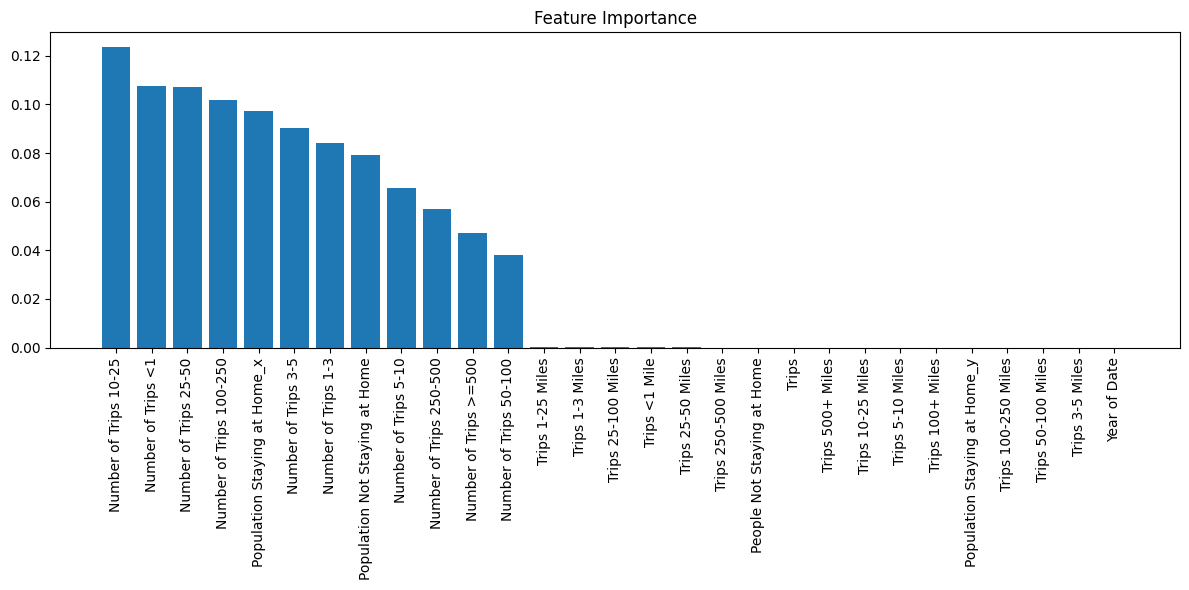

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load datasets
df_distance = pd.read_csv("Trips_by_Distance (1).csv")
df_full = pd.read_csv("Trips_Full Data (2).csv")

# 🔧 Convert 'Date' to datetime in both datasets
df_distance['Date'] = pd.to_datetime(df_distance['Date'], errors='coerce')
df_full['Date'] = pd.to_datetime(df_full['Date'], errors='coerce')

# 🧹 Drop any rows with invalid dates
df_distance = df_distance.dropna(subset=['Date'])
df_full = df_full.dropna(subset=['Date'])

# ✅ Merge on 'Date'
merged_df = pd.merge(df_distance, df_full, on='Date', how='inner')

# 🧼 Drop unnecessary or duplicate columns (ignore if missing)
drop_cols = ['Level_x', 'Level_y', 'State FIPS', 'County FIPS', 'Row ID', 'Week', 'Month',
             'State Postal Code', 'Week Ending Date']
merged_df = merged_df.drop(columns=[col for col in drop_cols if col in merged_df.columns], errors='ignore')

# Fill missing values
merged_df = merged_df.fillna(0)

# ✅ Check that 'Number of Trips' exists and is not empty
if 'Number of Trips' not in merged_df.columns:
    raise ValueError("Target column 'Number of Trips' not found in merged data.")

if merged_df['Number of Trips'].isna().all():
    raise ValueError("All values in 'Number of Trips' are missing after merge.")

# Features and target
target = 'Number of Trips'
features = merged_df.drop(columns=[target, 'Date'], errors='ignore')

# 🧠 Only use numeric features
X = features.select_dtypes(include=['number'])
y = merged_df[target]

# Final check
if len(X) == 0:
    raise ValueError("No training data available after preprocessing. Check the merge or input data.")

# 🔀 Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Mean Squared Error: {mse:.2f}")
print(f"✅ R² Score: {r2:.2f}")

# 📊 Feature importances
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


In [8]:
print("Columns in df_distance:")
print(df_distance.columns.tolist())

print("\nColumns in df_full:")
print(df_full.columns.tolist())

Columns in df_distance:
['Level', 'Date', 'State FIPS', 'State Postal Code', 'County FIPS', 'County Name', 'Population Staying at Home', 'Population Not Staying at Home', 'Number of Trips', 'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5', 'Number of Trips 5-10', 'Number of Trips 10-25', 'Number of Trips 25-50', 'Number of Trips 50-100', 'Number of Trips 100-250', 'Number of Trips 250-500', 'Number of Trips >=500', 'Row ID', 'Week', 'Month']

Columns in df_full:
['Month of Date', 'Week of Date', 'Year of Date', 'Level', 'Date', 'Week Ending Date', 'Trips <1 Mile', 'People Not Staying at Home', 'Population Staying at Home', 'Trips', 'Trips 1-25 Miles', 'Trips 1-3 Miles', 'Trips 10-25 Miles', 'Trips 100-250 Miles', 'Trips 100+ Miles', 'Trips 25-100 Miles', 'Trips 25-50 Miles', 'Trips 250-500 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles', 'Trips 50-100 Miles', 'Trips 500+ Miles']


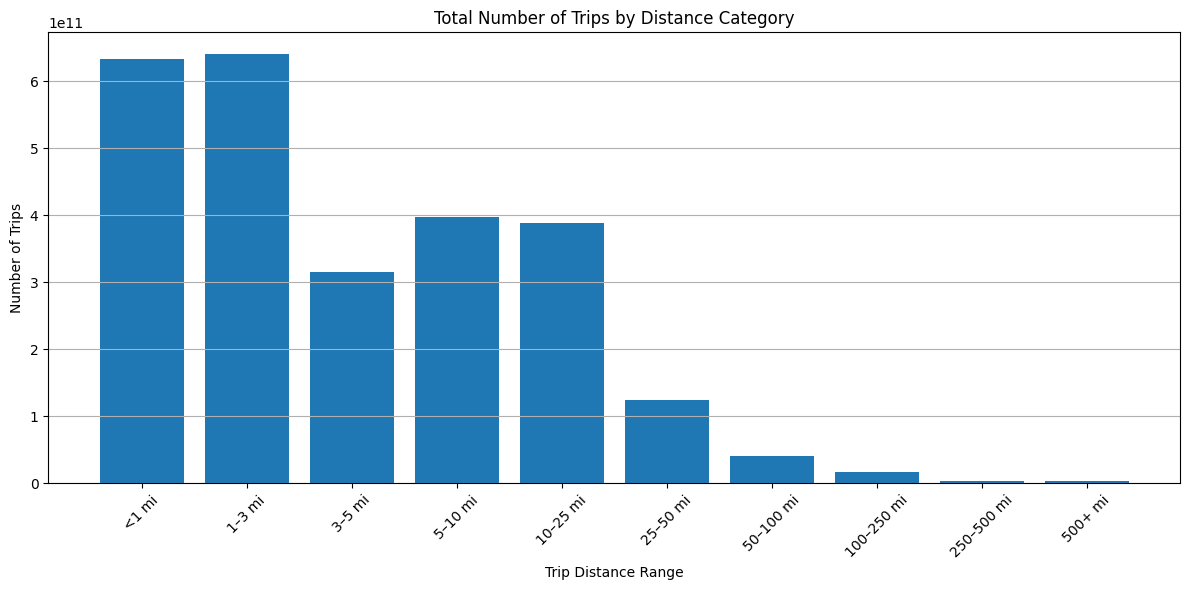

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df_distance = pd.read_csv("Trips_by_Distance (1).csv")

# Convert 'Date' column to datetime
df_distance['Date'] = pd.to_datetime(df_distance['Date'], errors='coerce')
df_distance = df_distance.dropna(subset=['Date'])

# Define distance-based columns
trip_distance_columns = [
    'Number of Trips <1',
    'Number of Trips 1-3',
    'Number of Trips 3-5',
    'Number of Trips 5-10',
    'Number of Trips 10-25',
    'Number of Trips 25-50',
    'Number of Trips 50-100',
    'Number of Trips 100-250',
    'Number of Trips 250-500',
    'Number of Trips >=500'
]

# Sum total trips across the whole dataset for each distance category
trip_totals = df_distance[trip_distance_columns].sum()

# Create readable labels
labels = [
    "<1 mi", "1–3 mi", "3–5 mi", "5–10 mi", "10–25 mi",
    "25–50 mi", "50–100 mi", "100–250 mi", "250–500 mi", "500+ mi"
]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(labels, trip_totals)
plt.title("Total Number of Trips by Distance Category")
plt.xlabel("Trip Distance Range")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Columns in Trips Full Data:
Index(['Month of Date', 'Week of Date', 'Year of Date', 'Level', 'Date',
       'Week Ending Date', 'Trips <1 Mile', 'People Not Staying at Home',
       'Population Staying at Home', 'Trips', 'Trips 1-25 Miles',
       'Trips 1-3 Miles', 'Trips 10-25 Miles', 'Trips 100-250 Miles',
       'Trips 100+ Miles', 'Trips 25-100 Miles', 'Trips 25-50 Miles',
       'Trips 250-500 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles',
       'Trips 50-100 Miles', 'Trips 500+ Miles'],
      dtype='object')

First few rows of Trips Full Data:
  Month of Date Week of Date  Year of Date     Level           Date  \
0        August      Week 32          2019  National  8/4/2019 0:00   
1        August      Week 32          2019  National  8/5/2019 0:00   
2        August      Week 32          2019  National  8/6/2019 0:00   
3        August      Week 32          2019  National  8/7/2019 0:00   
4        August      Week 32          2019  National  8/8/2019 0:00   

  Week Ending D

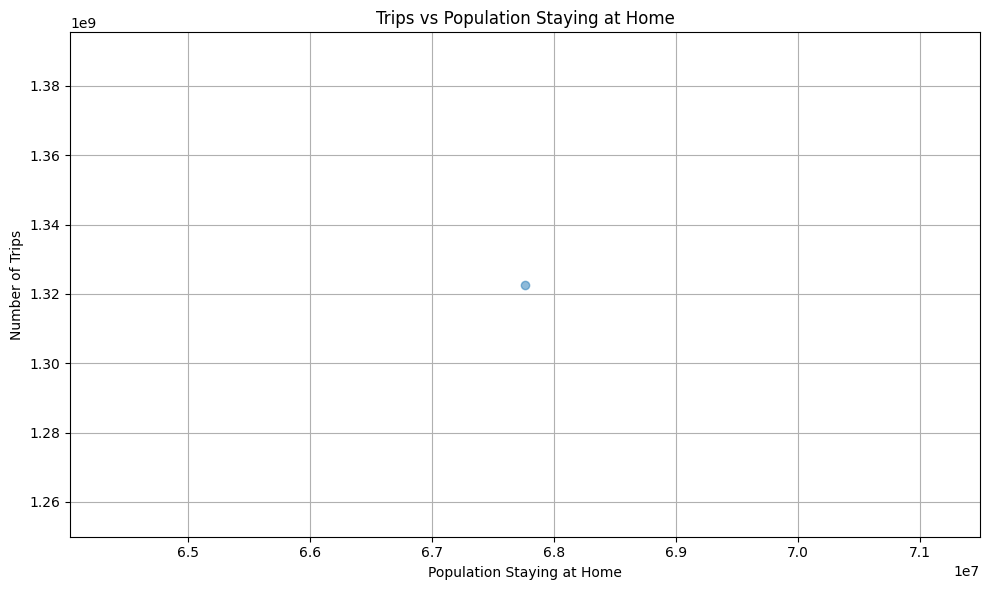

In [11]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Load your datasets as Dask DataFrames
trips_distance_dask = dd.read_csv('Trips_by_Distance (1).csv')
trips_full_dask = dd.read_csv('Trips_Full Data (2).csv')

# Preprocess the datasets
def preprocess_data(dask_df):
    # Fill missing values based on data type
    for column in dask_df.columns:
        if dask_df[column].dtype in ['float64', 'int64']:
            dask_df[column] = dask_df[column].fillna(0)  # Fill numeric columns with 0
        elif dask_df[column].dtype == 'object':
            dask_df[column] = dask_df[column].fillna('')  # Fill string columns with an empty string
            dask_df[column] = dask_df[column].astype('category')  # Convert string columns to categorical

    return dask_df

# Preprocess the datasets
trips_distance = preprocess_data(trips_distance_dask)
trips_full = preprocess_data(trips_full_dask)

# Check the columns and first few rows of the Trips Full Data
print("Columns in Trips Full Data:")
print(trips_full.columns)

print("\nFirst few rows of Trips Full Data:")
print(trips_full.head())  # No compute() needed here

# Analyze the data
def analyze_trips(trips_df):
    # Check the actual column names
    print("Available columns:", trips_df.columns)

    # Adjust these column names based on your actual DataFrame
    staying_home_column = 'Population Staying at Home'  # Change this to the actual column name
    distance_traveled_column = 'Trips'  # Change this to the actual column name

    # Count the number of people staying at home
    staying_home_count = trips_df[trips_df[staying_home_column] > 0].shape[0].compute()
    
    # Calculate the total distance traveled by people who are not staying at home
    distance_traveled = trips_df[trips_df[staying_home_column] == 0][distance_traveled_column].sum().compute()
    
    return staying_home_count, distance_traveled

# Perform the analysis on the Trips Full Data
staying_home_count, total_distance_traveled = analyze_trips(trips_full)

# Output the results
print(f"Number of people staying at home: {staying_home_count}")
print(f"Total distance traveled by people not staying at home: {total_distance_traveled} units")
# Convert a few key columns to Pandas for plotting (Dask plots require compute)
# Example: visualize 'Population Staying at Home' vs 'Trips'

# Select relevant columns and sample a manageable size for plotting
sample_df = trips_full[['Population Staying at Home', 'Trips']].sample(frac=0.1).compute()

# Scatter plot to see relationship between staying home and trips
plt.figure(figsize=(10, 6))
plt.scatter(sample_df['Population Staying at Home'], sample_df['Trips'], alpha=0.5)
plt.title('Trips vs Population Staying at Home')
plt.xlabel('Population Staying at Home')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.tight_layout()
plt.show()

Columns in Trips Full Data:
Index(['Month of Date', 'Week of Date', 'Year of Date', 'Level', 'Date',
       'Week Ending Date', 'Trips <1 Mile', 'People Not Staying at Home',
       'Population Staying at Home', 'Trips', 'Trips 1-25 Miles',
       'Trips 1-3 Miles', 'Trips 10-25 Miles', 'Trips 100-250 Miles',
       'Trips 100+ Miles', 'Trips 25-100 Miles', 'Trips 25-50 Miles',
       'Trips 250-500 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles',
       'Trips 50-100 Miles', 'Trips 500+ Miles'],
      dtype='object')

First few rows of Trips Full Data:
  Month of Date Week of Date  Year of Date     Level           Date  \
0        August      Week 32          2019  National  8/4/2019 0:00   
1        August      Week 32          2019  National  8/5/2019 0:00   
2        August      Week 32          2019  National  8/6/2019 0:00   
3        August      Week 32          2019  National  8/7/2019 0:00   
4        August      Week 32          2019  National  8/8/2019 0:00   

  Week Ending D

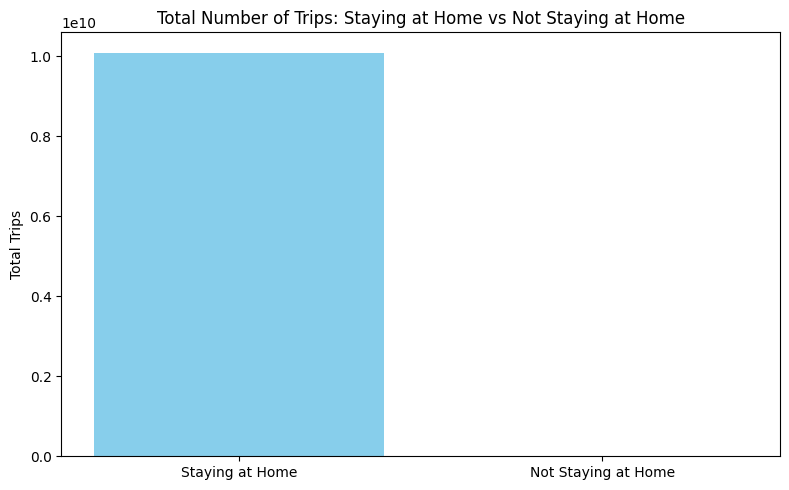

In [15]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Load your datasets as Dask DataFrames
trips_distance_dask = dd.read_csv('Trips_by_Distance (1).csv')
trips_full_dask = dd.read_csv('Trips_Full Data (2).csv')

# Preprocess the datasets
def preprocess_data(dask_df):
    # Fill missing values based on data type
    for column in dask_df.columns:
        if dask_df[column].dtype in ['float64', 'int64']:
            dask_df[column] = dask_df[column].fillna(0)  # Fill numeric columns with 0
        elif dask_df[column].dtype == 'object':
            dask_df[column] = dask_df[column].fillna('')  # Fill string columns with an empty string
            dask_df[column] = dask_df[column].astype('category')  # Convert string columns to categorical

    return dask_df

# Preprocess the datasets
trips_distance = preprocess_data(trips_distance_dask)
trips_full = preprocess_data(trips_full_dask)

# Check the columns and first few rows of the Trips Full Data
print("Columns in Trips Full Data:")
print(trips_full.columns)

print("\nFirst few rows of Trips Full Data:")
print(trips_full.head())  # No compute() needed here

# Analyze the data
def analyze_trips(trips_df):
    # Check the actual column names
    print("Available columns:", trips_df.columns)

    # Adjust these column names based on your actual DataFrame
    staying_home_column = 'Population Staying at Home'  # Change this to the actual column name
    distance_traveled_column = 'Trips'  # Change this to the actual column name

    # Count the number of people staying at home
    staying_home_count = trips_df[trips_df[staying_home_column] > 0].shape[0].compute()
    
    # Calculate the total distance traveled by people who are not staying at home
    distance_traveled = trips_df[trips_df[staying_home_column] == 0][distance_traveled_column].sum().compute()
    
    return staying_home_count, distance_traveled

# Perform the analysis on the Trips Full Data
staying_home_count, total_distance_traveled = analyze_trips(trips_full)

# Output the results
print(f"Number of people staying at home: {staying_home_count}")
print(f"Total distance traveled by people not staying at home: {total_distance_traveled} units")
# Compute the full dataframe just once (or sample a reasonable fraction if very large)
full_df = trips_full[['Population Staying at Home', 'Trips']].compute()

# ✅ Filter groups correctly
staying_home_df = full_df[full_df['Population Staying at Home'] > 0]
not_staying_home_df = full_df[full_df['Population Staying at Home'] == 0]

# ✅ Get total trips for each group (sum of 'Trips' column)
total_staying_home_trips = staying_home_df['Trips'].sum()
total_not_staying_home_trips = not_staying_home_df['Trips'].sum()

# ✅ Bar Plot – Compare total trips
plt.figure(figsize=(8, 5))
plt.bar(['Staying at Home', 'Not Staying at Home'],
        [total_staying_home_trips, total_not_staying_home_trips],
        color=['skyblue', 'orange'])
plt.title('Total Number of Trips: Staying at Home vs Not Staying at Home')
plt.ylabel('Total Trips')
plt.tight_layout()
plt.show()

In [ ]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
# Define the data types for the columns
dtype_dict = {
    'County Name': 'object',
    'Number of Trips': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips >=500': 'float64',
    'Population Not Staying at Home': 'float64',
    'Population Staying at Home': 'float64',
    'State Postal Code': 'object'
}

# Load the Trips by Distance dataset as a Dask DataFrame with specified dtypes
trips_distance_dask = dd.read_csv('Trips_by_Distance (1).csv', dtype=dtype_dict)

# Preprocess the dataset
def preprocess_data(dask_df):
    # Fill missing values based on data type
    for column in dask_df.columns:
        if dask_df[column].dtype in ['float64', 'int64']:
            dask_df[column] = dask_df[column].fillna(0)  # Fill numeric columns with 0
        elif dask_df[column].dtype == 'object':
            dask_df[column] = dask_df[column].fillna('')  # Fill string columns with an empty string
            dask_df[column] = dask_df[column].astype('category')  # Convert string columns to categorical

    return dask_df

# Preprocess the Trips by Distance dataset
trips_distance = preprocess_data(trips_distance_dask)

# Check the columns and first few rows of the Trips by Distance Data
print("Columns in Trips by Distance Data:")
print(trips_distance.columns)

print("\nFirst few rows of Trips by Distance Data:")
print(trips_distance.head())  # No compute() needed here

# Analyze the data
def analyze_trips_distance(trips_df):
    # Check the actual column names
    print("Available columns:", trips_df.columns)

    # Adjust these column names based on your actual DataFrame
    staying_home_column = 'Population Staying at Home'  # Change this to the actual column name if needed
    distance_traveled_column = 'Number of Trips'  # Change this to the actual column name if needed

    # Count the number of people staying at home
    staying_home_count = trips_df[trips_df[staying_home_column] > 0].shape[0].compute()
    
    # Calculate the total distance traveled by people who are not staying at home
    distance_traveled = trips_df[trips_df[staying_home_column] == 0][distance_traveled_column].sum().compute()
    
    return staying_home_count, distance_traveled

# Perform the analysis on the Trips by Distance Data
staying_home_count_distance, total_distance_traveled_distance = analyze_trips_distance(trips_distance)

# Output the results
print(f"Number of people staying at home (Trips by Distance): {staying_home_count_distance}")
print(f"Total distance traveled by people not staying at home (Trips by Distance): {total_distance_traveled_distance} units")
# Create data for the bar plot
labels = ['Staying at Home', 'Not Staying at Home (Distance Traveled)']
values = [staying_home_count_distance, total_distance_traveled_distance]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['skyblue', 'orange'])
plt.title('Comparison: People Staying at Home vs Distance Traveled (Not Staying at Home)')
plt.ylabel('Count / Units of Distance')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

Columns in Trips by Distance Data:
Index(['Level', 'Date', 'State FIPS', 'State Postal Code', 'County FIPS',
       'County Name', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500', 'Row ID', 'Week', 'Month'],
      dtype='object')

First few rows of Trips by Distance Data:
      Level      Date  State FIPS State Postal Code  County FIPS County Name  \
0  National  1/1/2019         0.0              <NA>          0.0        <NA>   
1  National  1/2/2019         0.0              <NA>          0.0        <NA>   
2  National  1/3/2019         0.0              <NA>          0.0        <NA>   
3  National  1/4/2019         0.0              <NA>          0.0        <NA>   
4  N

Columns in Trips by Distance Data:
Index(['Level', 'Date', 'State FIPS', 'State Postal Code', 'County FIPS',
       'County Name', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500', 'Row ID', 'Week', 'Month'],
      dtype='object')

First few rows of Trips by Distance Data:
      Level      Date  State FIPS State Postal Code  County FIPS County Name  \
0  National  1/1/2019         0.0              <NA>          0.0        <NA>   
1  National  1/2/2019         0.0              <NA>          0.0        <NA>   
2  National  1/3/2019         0.0              <NA>          0.0        <NA>   
3  National  1/4/2019         0.0              <NA>          0.0        <NA>   
4  N

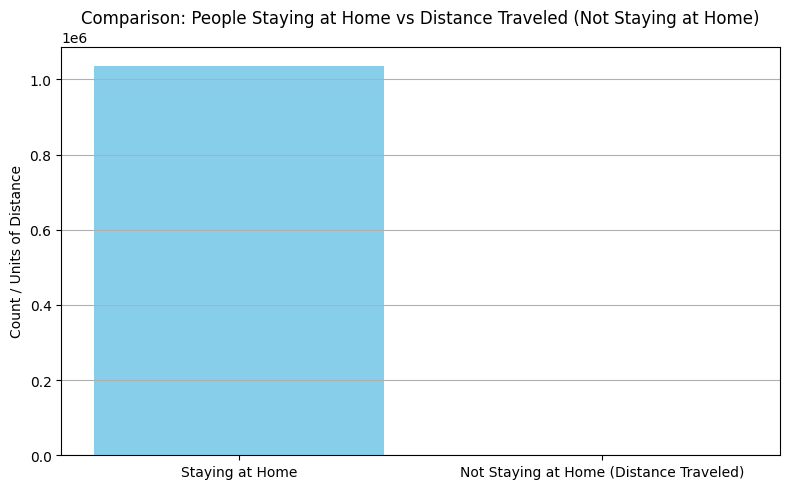

In [1]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
# Define the data types for the columns
dtype_dict = {
    'County Name': 'object',
    'Number of Trips': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips >=500': 'float64',
    'Population Not Staying at Home': 'float64',
    'Population Staying at Home': 'float64',
    'State Postal Code': 'object'
}

# Load the Trips by Distance dataset as a Dask DataFrame with specified dtypes
trips_distance_dask = dd.read_csv('Trips_by_Distance (1).csv', dtype=dtype_dict)

# Preprocess the dataset
def preprocess_data(dask_df):
    # Fill missing values based on data type
    for column in dask_df.columns:
        if dask_df[column].dtype in ['float64', 'int64']:
            dask_df[column] = dask_df[column].fillna(0)  # Fill numeric columns with 0
        elif dask_df[column].dtype == 'object':
            dask_df[column] = dask_df[column].fillna('')  # Fill string columns with an empty string
            dask_df[column] = dask_df[column].astype('category')  # Convert string columns to categorical

    return dask_df

# Preprocess the Trips by Distance dataset
trips_distance = preprocess_data(trips_distance_dask)

# Check the columns and first few rows of the Trips by Distance Data
print("Columns in Trips by Distance Data:")
print(trips_distance.columns)

print("\nFirst few rows of Trips by Distance Data:")
print(trips_distance.head())  # No compute() needed here

# Analyze the data
def analyze_trips_distance(trips_df):
    # Check the actual column names
    print("Available columns:", trips_df.columns)

    # Adjust these column names based on your actual DataFrame
    staying_home_column = 'Population Staying at Home'  # Change this to the actual column name if needed
    distance_traveled_column = 'Number of Trips'  # Change this to the actual column name if needed

    # Count the number of people staying at home
    staying_home_count = trips_df[trips_df[staying_home_column] > 0].shape[0].compute()
    
    # Calculate the total distance traveled by people who are not staying at home
    distance_traveled = trips_df[trips_df[staying_home_column] == 0][distance_traveled_column].sum().compute()
    
    return staying_home_count, distance_traveled

# Perform the analysis on the Trips by Distance Data
staying_home_count_distance, total_distance_traveled_distance = analyze_trips_distance(trips_distance)

# Output the results
print(f"Number of people staying at home (Trips by Distance): {staying_home_count_distance}")
print(f"Total distance traveled by people not staying at home (Trips by Distance): {total_distance_traveled_distance} units")
# Create data for the bar plot
labels = ['Staying at Home', 'Not Staying at Home (Distance Traveled)']
values = [staying_home_count_distance, total_distance_traveled_distance]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['skyblue', 'orange'])
plt.title('Comparison: People Staying at Home vs Distance Traveled (Not Staying at Home)')
plt.ylabel('Count / Units of Distance')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

Columns in Trips by Distance Data:
['Level', 'Date', 'State FIPS', 'State Postal Code', 'County FIPS', 'County Name', 'Population Staying at Home', 'Population Not Staying at Home', 'Number of Trips', 'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5', 'Number of Trips 5-10', 'Number of Trips 10-25', 'Number of Trips 25-50', 'Number of Trips 50-100', 'Number of Trips 100-250', 'Number of Trips 250-500', 'Number of Trips >=500', 'Row ID', 'Week', 'Month']

First few rows of Trips by Distance Data:
      Level      Date  State FIPS State Postal Code  County FIPS County Name  \
0  National  1/1/2019         0.0              <NA>          0.0        <NA>   
1  National  1/2/2019         0.0              <NA>          0.0        <NA>   
2  National  1/3/2019         0.0              <NA>          0.0        <NA>   
3  National  1/4/2019         0.0              <NA>          0.0        <NA>   
4  National  1/5/2019         0.0              <NA>          0.0        <NA>   

 

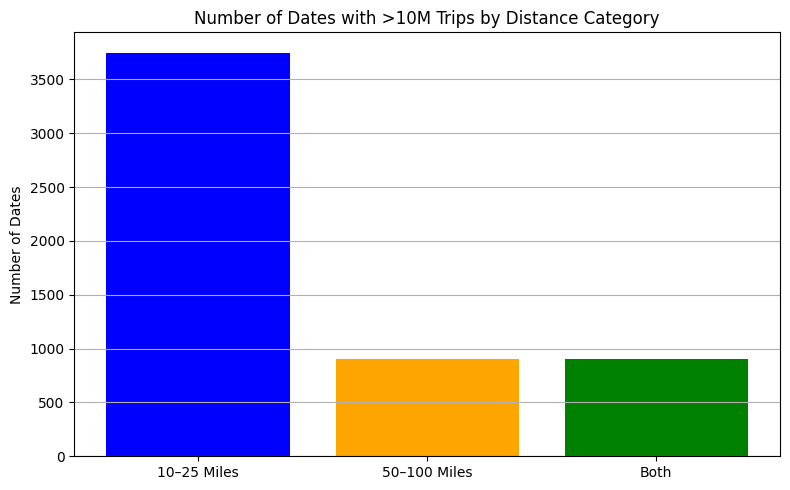

In [2]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Define the data types for the columns
dtype_dict = {
    'County Name': 'object',
    'Number of Trips': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips >=500': 'float64',
    'Population Not Staying at Home': 'float64',
    'Population Staying at Home': 'float64',
    'State Postal Code': 'object'
}

# Load the Trips by Distance dataset as a Dask DataFrame with specified dtypes
trips_distance_dask = dd.read_csv('Trips_by_Distance (1).csv', dtype=dtype_dict)

# Preprocess the dataset
def preprocess_distance_data(dask_df):
    # Fill missing values based on data type
    for column in dask_df.columns:
        if dask_df[column].dtype in ['float64', 'int64']:
            dask_df[column] = dask_df[column].fillna(0)  # Fill numeric columns with 0
        elif dask_df[column].dtype == 'object':
            dask_df[column] = dask_df[column].fillna('')  # Fill string columns with an empty string
            dask_df[column] = dask_df[column].astype('category')  # Convert string columns to categorical

    return dask_df

# Preprocess the Trips by Distance dataset
trips_distance = preprocess_distance_data(trips_distance_dask)

# Check the columns and first few rows of the Trips by Distance Data
print("Columns in Trips by Distance Data:")
print(trips_distance.columns.tolist())  # Print the list of columns

# Compute and print the first few rows
print("\nFirst few rows of Trips by Distance Data:")
print(trips_distance.head())  # No compute() needed here

# Identify relevant columns for analysis
trips_10_25_column = 'Number of Trips 10-25'  # Corrected column name
trips_50_100_column = 'Number of Trips 50-100'  # Corrected column name
date_column = 'Date'  # Assuming this is the correct date column

# Check if the columns exist
if trips_10_25_column not in trips_distance.columns:
    print(f"Column '{trips_10_25_column}' does not exist in the DataFrame.")
if trips_50_100_column not in trips_distance.columns:
    print(f"Column '{trips_50_100_column}' does not exist in the DataFrame.")
if date_column not in trips_distance.columns:
    print(f"Column '{date_column}' does not exist in the DataFrame.")

# Filter for dates where more than 10,000,000 people conducted trips in the 10-25 category
dates_10_25 = trips_distance[trips_distance[trips_10_25_column] > 10000000][[date_column, trips_10_25_column]].compute()
print("Dates with > 10,000,000 trips in the 10-25 category:")
print(dates_10_25)

# Filter for dates where more than 10,000,000 people conducted trips in the 50-100 category
dates_50_100 = trips_distance[trips_distance[trips_50_100_column] > 10000000][[date_column, trips_50_100_column]].compute()
print("\nDates with > 10,000,000 trips in the 50-100 category:")
print(dates_50_100)

# Compare the sets of dates
common_dates = set(dates_10_25[date_column]) & set(dates_50_100[date_column])
print("\nCommon dates where both categories had > 10,000,000 trips:")
print(common_dates)
# 1. Bar chart of counts per trip distance category
count_10_25 = len(dates_10_25)
count_50_100 = len(dates_50_100)
count_common = len(common_dates)

plt.figure(figsize=(8, 5))
plt.bar(['10–25 Miles', '50–100 Miles', 'Both'], [count_10_25, count_50_100, count_common], color=['blue', 'orange', 'green'])
plt.title('Number of Dates with >10M Trips by Distance Category')
plt.ylabel('Number of Dates')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
import dask.dataframe as dd
import pandas as pd
from dask.distributed import Client
import time
import matplotlib.pyplot as plt

# ----------------------------
# Define column data types
# ----------------------------
dtype_dict = {
    'County Name': 'category',
    'Number of Trips': 'float32',
    'Number of Trips 1-3': 'float32',
    'Number of Trips 10-25': 'float32',
    'Number of Trips 100-250': 'float32',
    'Number of Trips 25-50': 'float32',
    'Number of Trips 250-500': 'float32',
    'Number of Trips 3-5': 'float32',
    'Number of Trips 5-10': 'float32',
    'Number of Trips 50-100': 'float32',
    'Number of Trips <1': 'float32',
    'Number of Trips >=500': 'float32',
    'Population Not Staying at Home': 'float32',
    'Population Staying at Home': 'float32',
    'State Postal Code': 'category',
    'Date': 'object'  # Keep as string, converted later if needed
}

# ----------------------------
# Data preprocessing function
# ----------------------------
def preprocess_distance_data(df):
    for column in df.columns:
        if df[column].dtype in ['float32', 'float64', 'int64']:
            df[column] = df[column].fillna(0)
        elif df[column].dtype == 'object':
            df[column] = df[column].fillna('')
            df[column] = df[column].astype('category')
    return df

# ----------------------------
# Dask analysis function
# ----------------------------
def analyze_with_dask(n_workers):
    client = Client(n_workers=n_workers, memory_limit='1GB', dashboard_address=None)
    trips_distance_dask = dd.read_csv('Trips_by_Distance (1).csv', dtype=dtype_dict, blocksize='16MB')
    trips_distance = preprocess_distance_data(trips_distance_dask)
    trips_distance = trips_distance.repartition(npartitions=20)

    trips_10_25_column = 'Number of Trips 10-25'
    trips_50_100_column = 'Number of Trips 50-100'
    date_column = 'Date'

    start_time = time.time()

    dates_10_25 = trips_distance[trips_distance[trips_10_25_column] > 10000000][[date_column, trips_10_25_column]].compute()
    dates_50_100 = trips_distance[trips_distance[trips_50_100_column] > 10000000][[date_column, trips_50_100_column]].compute()
    common_dates = set(dates_10_25[date_column]) & set(dates_50_100[date_column])

    end_time = time.time()
    time_taken = end_time - start_time

    print(f"\nUsing Dask with {n_workers} processors — Time: {time_taken:.2f} seconds")
    print(f"Dates (10–25 miles): {len(dates_10_25)}")
    print(f"Dates (50–100 miles): {len(dates_50_100)}")
    print(f"Common Dates: {len(common_dates)}")
    
    client.shutdown()
    return time_taken

# ----------------------------
# Pandas analysis function
# ----------------------------
def analyze_with_pandas():
    trips_distance = pd.read_csv('Trips_by_Distance (1).csv', dtype=dtype_dict)
    trips_distance = preprocess_distance_data(trips_distance)

    trips_10_25_column = 'Number of Trips 10-25'
    trips_50_100_column = 'Number of Trips 50-100'
    date_column = 'Date'

    start_time = time.time()

    dates_10_25 = trips_distance[trips_distance[trips_10_25_column] > 10000000][[date_column, trips_10_25_column]]
    dates_50_100 = trips_distance[trips_distance[trips_50_100_column] > 10000000][[date_column, trips_50_100_column]]
    common_dates = set(dates_10_25[date_column]) & set(dates_50_100[date_column])

    end_time = time.time()
    time_taken = end_time - start_time

    print(f"\nUsing Pandas — Time: {time_taken:.2f} seconds")
    print(f"Dates (10–25 miles): {len(dates_10_25)}")
    print(f"Dates (50–100 miles): {len(dates_50_100)}")
    print(f"Common Dates: {len(common_dates)}")

    return time_taken

# ----------------------------
# Run All Analyses
# ----------------------------
time_pandas = analyze_with_pandas()
time_dask_10 = analyze_with_dask(n_workers=10)
time_dask_20 = analyze_with_dask(n_workers=20)

# ----------------------------
# Visualize Comparison
# ----------------------------
labels = ['Pandas', 'Dask (10 CPUs)', 'Dask (20 CPUs)']
times = [time_pandas, time_dask_10, time_dask_20]

plt.figure(figsize=(8, 5))
plt.bar(labels, times, color=['gray', 'skyblue', 'orange'])
plt.title('Execution Time Comparison: Pandas vs Dask')
plt.ylabel('Time (seconds)')
plt.xlabel('Processing Method')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
import dask.dataframe as dd
import pandas as pd
from dask.distributed import Client
import time
import matplotlib.pyplot as plt

# ----------------------------
# Define column data types
# ----------------------------
dtype_dict = {
    'County Name': 'category',
    'Number of Trips': 'float32',
    'Number of Trips 1-3': 'float32',
    'Number of Trips 10-25': 'float32',
    'Number of Trips 100-250': 'float32',
    'Number of Trips 25-50': 'float32',
    'Number of Trips 250-500': 'float32',
    'Number of Trips 3-5': 'float32',
    'Number of Trips 5-10': 'float32',
    'Number of Trips 50-100': 'float32',
    'Number of Trips <1': 'float32',
    'Number of Trips >=500': 'float32',
    'Population Not Staying at Home': 'float32',
    'Population Staying at Home': 'float32',
    'State Postal Code': 'category',
    'Date': 'object'  # Keep as string, converted later if needed
}

# ----------------------------
# Data preprocessing function
# ----------------------------
def preprocess_distance_data(df):
    for column in df.columns:
        if df[column].dtype in ['float32', 'float64', 'int64']:
            df[column] = df[column].fillna(0)
        elif df[column].dtype == 'object':
            df[column] = df[column].fillna('')
            df[column] = df[column].astype('category')
    return df

# ----------------------------
# Dask analysis function
# ----------------------------
def analyze_with_dask(n_workers):
    client = Client(n_workers=n_workers, memory_limit='1GB', dashboard_address=None)
    trips_distance_dask = dd.read_csv('Trips_by_Distance (1).csv', dtype=dtype_dict, blocksize='16MB')
    trips_distance = preprocess_distance_data(trips_distance_dask)
    trips_distance = trips_distance.repartition(npartitions=20)

    trips_10_25_column = 'Number of Trips 10-25'
    trips_50_100_column = 'Number of Trips 50-100'
    date_column = 'Date'

    start_time = time.time()

    dates_10_25 = trips_distance[trips_distance[trips_10_25_column] > 10000000][[date_column, trips_10_25_column]].compute()
    dates_50_100 = trips_distance[trips_distance[trips_50_100_column] > 10000000][[date_column, trips_50_100_column]].compute()
    common_dates = set(dates_10_25[date_column]) & set(dates_50_100[date_column])

    end_time = time.time()
    time_taken = end_time - start_time

    print(f"\nUsing Dask with {n_workers} processors — Time: {time_taken:.2f} seconds")
    print(f"Dates (10–25 miles): {len(dates_10_25)}")
    print(f"Dates (50–100 miles): {len(dates_50_100)}")
    print(f"Common Dates: {len(common_dates)}")
    
    client.shutdown()
    return time_taken

# ----------------------------
# Pandas analysis function
# ----------------------------
def analyze_with_pandas():
    trips_distance = pd.read_csv('Trips_by_Distance (1).csv', dtype=dtype_dict)
    trips_distance = preprocess_distance_data(trips_distance)

    trips_10_25_column = 'Number of Trips 10-25'
    trips_50_100_column = 'Number of Trips 50-100'
    date_column = 'Date'

    start_time = time.time()

    dates_10_25 = trips_distance[trips_distance[trips_10_25_column] > 10000000][[date_column, trips_10_25_column]]
    dates_50_100 = trips_distance[trips_distance[trips_50_100_column] > 10000000][[date_column, trips_50_100_column]]
    common_dates = set(dates_10_25[date_column]) & set(dates_50_100[date_column])

    end_time = time.time()
    time_taken = end_time - start_time

    print(f"\nUsing Pandas — Time: {time_taken:.2f} seconds")
    print(f"Dates (10–25 miles): {len(dates_10_25)}")
    print(f"Dates (50–100 miles): {len(dates_50_100)}")
    print(f"Common Dates: {len(common_dates)}")

    return time_taken

# ----------------------------
# Run All Analyses
# ----------------------------
time_pandas = analyze_with_pandas()
time_dask_10 = analyze_with_dask(n_workers=10)
time_dask_20 = analyze_with_dask(n_workers=20)

# ----------------------------
# Visualize Comparison
# ----------------------------
labels = ['Pandas', 'Dask (10 CPUs)', 'Dask (20 CPUs)']
times = [time_pandas, time_dask_10, time_dask_20]

plt.figure(figsize=(8, 5))
plt.bar(labels, times, color=['gray', 'skyblue', 'orange'])
plt.title('Execution Time Comparison: Pandas vs Dask')
plt.ylabel('Time (seconds)')
plt.xlabel('Processing Method')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Using Pandas — Time: 0.06 seconds
Dates (10–25 miles): 3749
Dates (50–100 miles): 900
Common Dates: 900


In [ ]:
import dask.dataframe as dd
import pandas as pd
from dask.distributed import Client
import time
import matplotlib.pyplot as plt

# ----------------------------
# Define column data types
# ----------------------------
dtype_dict = {
    'County Name': 'category',
    'Number of Trips': 'float32',
    'Number of Trips 1-3': 'float32',
    'Number of Trips 10-25': 'float32',
    'Number of Trips 100-250': 'float32',
    'Number of Trips 25-50': 'float32',
    'Number of Trips 250-500': 'float32',
    'Number of Trips 3-5': 'float32',
    'Number of Trips 5-10': 'float32',
    'Number of Trips 50-100': 'float32',
    'Number of Trips <1': 'float32',
    'Number of Trips >=500': 'float32',
    'Population Not Staying at Home': 'float32',
    'Population Staying at Home': 'float32',
    'State Postal Code': 'category',
    'Date': 'object'  # Keep as string, converted later if needed
}

# ----------------------------
# Data preprocessing function
# ----------------------------
def preprocess_distance_data(df):
    for column in df.columns:
        if df[column].dtype in ['float32', 'float64', 'int64']:
            df[column] = df[column].fillna(0)
        elif df[column].dtype == 'object':
            df[column] = df[column].fillna('')
            df[column] = df[column].astype('category')
    return df

# ----------------------------
# Dask analysis function
# ----------------------------
def analyze_with_dask(n_workers):
    client = Client(n_workers=n_workers, memory_limit='1GB', dashboard_address=None)
    trips_distance_dask = dd.read_csv('Trips_by_Distance (1).csv', dtype=dtype_dict, blocksize='16MB')
    trips_distance = preprocess_distance_data(trips_distance_dask)
    trips_distance = trips_distance.repartition(npartitions=20)

    trips_10_25_column = 'Number of Trips 10-25'
    trips_50_100_column = 'Number of Trips 50-100'
    date_column = 'Date'

    start_time = time.time()

    dates_10_25 = trips_distance[trips_distance[trips_10_25_column] > 10000000][[date_column, trips_10_25_column]].compute()
    dates_50_100 = trips_distance[trips_distance[trips_50_100_column] > 10000000][[date_column, trips_50_100_column]].compute()
    common_dates = set(dates_10_25[date_column]) & set(dates_50_100[date_column])

    end_time = time.time()
    time_taken = end_time - start_time

    print(f"\nUsing Dask with {n_workers} processors — Time: {time_taken:.2f} seconds")
    print(f"Dates (10–25 miles): {len(dates_10_25)}")
    print(f"Dates (50–100 miles): {len(dates_50_100)}")
    print(f"Common Dates: {len(common_dates)}")
    
    client.shutdown()
    return time_taken

# ----------------------------
# Pandas analysis function
# ----------------------------
def analyze_with_pandas():
    trips_distance = pd.read_csv('Trips_by_Distance (1).csv', dtype=dtype_dict)
    trips_distance = preprocess_distance_data(trips_distance)

    trips_10_25_column = 'Number of Trips 10-25'
    trips_50_100_column = 'Number of Trips 50-100'
    date_column = 'Date'

    start_time = time.time()

    dates_10_25 = trips_distance[trips_distance[trips_10_25_column] > 10000000][[date_column, trips_10_25_column]]
    dates_50_100 = trips_distance[trips_distance[trips_50_100_column] > 10000000][[date_column, trips_50_100_column]]
    common_dates = set(dates_10_25[date_column]) & set(dates_50_100[date_column])

    end_time = time.time()
    time_taken = end_time - start_time

    print(f"\nUsing Pandas — Time: {time_taken:.2f} seconds")
    print(f"Dates (10–25 miles): {len(dates_10_25)}")
    print(f"Dates (50–100 miles): {len(dates_50_100)}")
    print(f"Common Dates: {len(common_dates)}")

    return time_taken

# ----------------------------
# Run All Analyses
# ----------------------------
time_pandas = analyze_with_pandas()
time_dask_10 = analyze_with_dask(n_workers=10)
time_dask_20 = analyze_with_dask(n_workers=20)

# ----------------------------
# Visualize Comparison
# ----------------------------
labels = ['Pandas', 'Dask (10 CPUs)', 'Dask (20 CPUs)']
times = [time_pandas, time_dask_10, time_dask_20]

plt.figure(figsize=(8, 5))
plt.bar(labels, times, color=['gray', 'skyblue', 'orange'])
plt.title('Execution Time Comparison: Pandas vs Dask')
plt.ylabel('Time (seconds)')
plt.xlabel('Processing Method')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Using Pandas — Time: 0.04 seconds
Dates (10–25 miles): 3749
Dates (50–100 miles): 900
Common Dates: 900
